# Bases de Datos III: Tarea Nº3 (20%)

## 1. Importacion del dataset

### 1.1 Descripción de los datos

**Track.Name** *(String - cadena de texto)*: 
- Descripción: Nombre de la pista o canción.

**Artist.Name** *(String - cadena de texto)*:
  - Descripción: Nombre del artista o banda que interpreta la canción.

**Genre** *(String - cadena de texto)*:
  - Descripción: Género musical al que pertenece la canción.

**Beats.Per.Minute** *(Integer - entero)*:
  - Descripción: Los latidos por minuto de la canción, un indicativo de su tempo.

**Energy** *(Integer - entero)*:
  - Descripción: Medida de intensidad y actividad.

**Danceability** *(Integer - entero)*:
  - Descripción: Medida de cuán adecuada es una canción para bailar.

**Loudness..dB..** *(Integer - entero)*:
  - Descripción: Volumen de la canción en decibelios.

**Liveness** *(Integer - entero)*:
  - Descripción: Presencia de público en la grabación de la canción. Un valor alto indica que es una grabación en vivo.

**Valence.** *(Integer - entero)*:
  - Descripción: Medida de positividad en la canción.

**Length.** *(Integer - entero)*:
  - Descripción: Duración de la canción en segundos.

**Acousticness..** *(Integer - entero)*:
  - Descripción: Medida que indica cuán acústica es una canción.

**Speechiness.** *(Integer - entero)*:
  - Descripción: Medida que indica la presencia de palabras habladas en la canción.

**Popularity** *(Integer - entero)*:
  - Descripción: Popularidad de la canción en Spotify.

### 1.2 Importacion de los datos

In [350]:
import pandas as pd

# Cargar CSV 
spotify = pd.read_csv("./data/50MasEscuchadosSpotify.csv", encoding='ISO-8859-1')

In [359]:
spotify.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


### 1.3 Importacion de librerias

In [352]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Pre-procesamiento de los datos

### 2.1 Selección de los caracteristicas

In [353]:
# Seleccionar características para la agrupación
features = spotify[['Beats.Per.Minute', 'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.', 'Acousticness..', 'Speechiness.', 'Popularity']]

In [360]:
features.head()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,117,55,76,-6,8,75,191,4,3,79
1,105,81,79,-4,8,61,302,8,9,92
3,93,65,64,-8,8,55,198,12,19,86
4,150,65,58,-4,11,18,175,45,7,94
5,102,68,80,-5,9,84,220,9,4,84


### 2.2 Tratar valores atipicos

In [356]:
import numpy as np

z_scores = np.abs((features - np.mean(features, axis=0)) / np.std(features, axis=0))
features = features[(z_scores < 3).all(axis=1)]

### 2.3 Normalización de los datos

In [357]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [362]:
print(features_scaled)

[[-0.09926416 -0.61292019  0.30486476 -0.1200985  -0.6155668   0.93666605
  -0.26668881 -0.96811402 -0.90367256 -2.39054888]
 [-0.50817324  1.22892039  0.62602     0.88436169 -0.6155668   0.3063495
   2.49540666 -0.75705598 -0.31681697  1.06246617]
 [-0.91708233  0.09548003 -0.97975621 -1.12455869 -0.6155668   0.03621384
  -0.09250261 -0.54599795  0.66127568 -0.53123308]
 [ 1.02523582  0.09548003 -1.62206669  0.88436169 -0.29859584 -1.62962274
  -0.6648287   1.19523081 -0.5124355   1.59369925]
 [-0.61040051  0.3080001   0.73307175  0.3821316  -0.50990981  1.34186954
   0.45493974 -0.70429148 -0.80586329 -1.06246617]
 [ 2.04750852  0.02464001  0.19781301 -0.1200985  -0.72122379 -1.40450969
  -1.75971339 -1.07364303  1.63936834  1.06246617]
 [-0.3037187   0.3080001  -2.69258416  0.3821316  -0.6155668  -0.86423837
   0.00703236 -0.38770443 -0.31681697  0.53123308]
 [ 0.54817522 -0.11704004  1.58948572 -0.1200985  -0.29859584  0.44141733
  -1.11273607 -0.91534951 -0.2190077  -0.26561654]
 

### 2.4 Reduccion de dimensionalidad

In [363]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(features_scaled)

In [364]:
print(data_pca)

[[-9.57433634e-01 -2.27412164e+00 -4.52199276e-01 -4.97732932e-02
  -5.94892702e-02  2.22819825e-01 -1.33810673e+00  9.51535479e-01]
 [-1.92709507e+00  9.47201702e-01 -6.01692467e-01  1.33420034e+00
   9.70344410e-01  4.62735616e-01  6.01778977e-01 -1.35142673e+00]
 [ 4.81724380e-01 -5.54527375e-01  3.98433048e-02  3.40874652e-01
   2.44832023e-01 -4.80028368e-01 -1.47316461e+00 -9.61016439e-01]
 [ 1.26157391e+00  2.07245465e+00  9.61463193e-01 -1.53959817e+00
   1.03205642e+00  1.17420912e+00  3.36785136e-01  2.56179347e-01]
 [-1.77504440e+00 -1.33614120e+00 -4.83388266e-01  1.18906011e-01
  -2.13607753e-01  1.92776542e-01 -3.65274965e-01 -2.14264993e-01]
 [ 2.06391130e+00  1.20799397e+00 -2.40456965e+00 -9.96281471e-01
   8.29200260e-01 -4.91016055e-01  2.88264867e-01  7.35667899e-01]
 [ 2.71107521e-01  1.37705263e+00  9.60499921e-01 -7.73141404e-01
   1.43235936e+00  4.60116581e-01 -1.72300459e+00 -6.54220373e-01]
 [-1.83744915e-01 -1.11279828e+00 -1.50512636e+00 -7.29358269e-01
  -

### 2.5 Datos finales

## 4. Análisis de clústers

### 4.1 Análisis Partitioning Clustering: K-means

#### 4.1.1 Justificacion

**¿En qué consiste?**
El algoritmo KMeans busca particionar un conjunto de puntos en K grupos, donde cada punto pertenece al grupo cuyo centroide está más cerca. El algoritmo de "MiniBatch" en MiniBatchKMeans es una variante de KMeans que utiliza mini-lotes para reducir el tiempo de cómputo. Mientras que el algoritmo estándar KMeans utiliza todos los datos disponibles en cada iteración para recalcular los centroides, MiniBatchKMeans utiliza solo una pequeña muestra aleatoria en cada iteración. Esta aproximación acelera significativamente el algoritmo y lo hace apto para conjuntos de datos grandes.

**Propósito**
El propósito principal de MiniBatchKMeans es realizar una agrupación de los datos basada en la proximidad a centroides específicos pero de una manera más eficiente en términos de tiempo de cómputo en comparación con el KMeans estándar, especialmente cuando se trabaja con grandes volúmenes de datos.

**¿Por qué es adecuado para esta instancia?**

1. **Eficiencia**: Si tu conjunto de datos es bastante grande, el MiniBatchKMeans puede ser una excelente opción debido a su eficiencia computacional.
2. **Simplicidad**: A pesar de ser una variante, sigue siendo un método intuitivo y fácil de interpretar.
3. **Resultados similares a KMeans**: A pesar de su eficiencia, en muchos casos, produce resultados muy similares al KMeans estándar.

**Conclusión**
Dado el propósito de agrupar datos en clústeres basados en la similitud y considerando la eficiencia y simplicidad de MiniBatchKMeans, este método parece ser una elección adecuada para nuestro análisis de Partitioning Clustering en el conjunto de datos actual. Es especialmente beneficioso si esperamos que los futuros conjuntos de datos con los que trabajaremos sean más grandes, ya que nos brinda una herramienta escalable.

#### 4.1.2 Elección del número óptimo de clústers con el método Elbow

##### 4.1.2.1 Justifacion

El Método Elbow, también conocido como método del codo, es una técnica utilizada en análisis de clustering para determinar el número óptimo de clusters en un conjunto de datos. La técnica implica trazar la variación explicada, en este caso denominada "distorsión", en función del número de clusters. A medida que aumenta el número de clusters, la distorsión generalmente disminuye. Esto se debe a que, cuando hay más clusters, los puntos de datos tienden a estar más cerca de los centroides de sus respectivos clusters. Sin embargo, aumentar el número de clusters más allá de un cierto punto resulta en rendimientos decrecientes en términos de reducción de distorsión. El objetivo es identificar el punto en el que agregar más clusters ya no proporciona un beneficio significativo en términos de disminución de la distorsión. Este punto se asemeja a un "codo" en el gráfico, de ahí el nombre del método.

Elegimos usar el Método Elbow porque nos permite tomar una decisión informada sobre cuántos clusters utilizar basándonos en un criterio cuantitativo. En lugar de hacer una elección arbitraria o basarse únicamente en el conocimiento del dominio, el Método Elbow nos da una pauta visual y cuantitativa para esta decisión crucial en el análisis de clustering.

##### 4.1.2.2 Aplicación del método Elbow

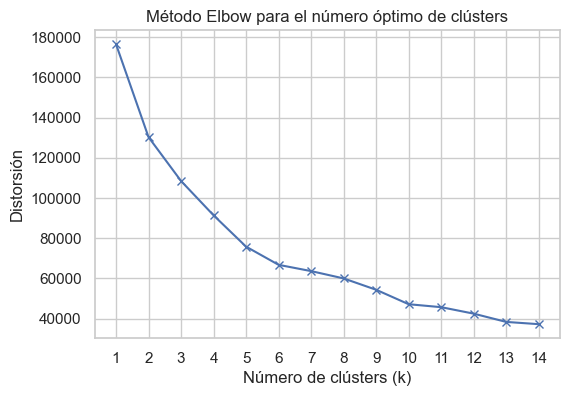

In [347]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Método Elbow para encontrar el número óptimo de clústers
distortions = []
K = list(range(1, 15))  # Ahora K es una lista de números del 1 al 14
for k in K:
    kmeanModel = MiniBatchKMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeanModel.fit(features)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clústers (k)')
plt.ylabel('Distorsión')
plt.title('Método Elbow para el número óptimo de clústers')
plt.xticks(range(1, 15))
plt.show()


##### 4.1.2.3 Interpretación de los Resultados del Método Elbow

Al observar el gráfico generado por el Método Elbow para nuestros datos, notamos que la distorsión disminuye rápidamente desde 2 hasta aproximadamente 5 clusters. Posteriormente, la tasa de disminución de la distorsión comienza a nivelarse y se estabiliza. El "codo" del gráfico, que indica el punto en el que la reducción de la distorsión empieza a ser menos significativa al agregar más clusters, parece estar alrededor de k=5. Por lo tanto, podemos concluir que el número óptimo de clusters para nuestros datos es 5.

#### 4.1.3 Clasificación con el modelo

In [348]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Suponiendo que 'datos' es tu conjunto de datos
k = 4  # por ejemplo, para 3 clústeres; pero deberías usar el método Elbow o Silhouette para determinar el mejor valor

kmeans = KMeans(n_clusters=k)
kmeans.fit(spotifyScaled)

spotify['Cluster'] = kmeans.labels_

ValueError: could not convert string to float: 'Señorita'

#### 4.1.4 Matriz de confusión

#### 4.1.5 Gráficos

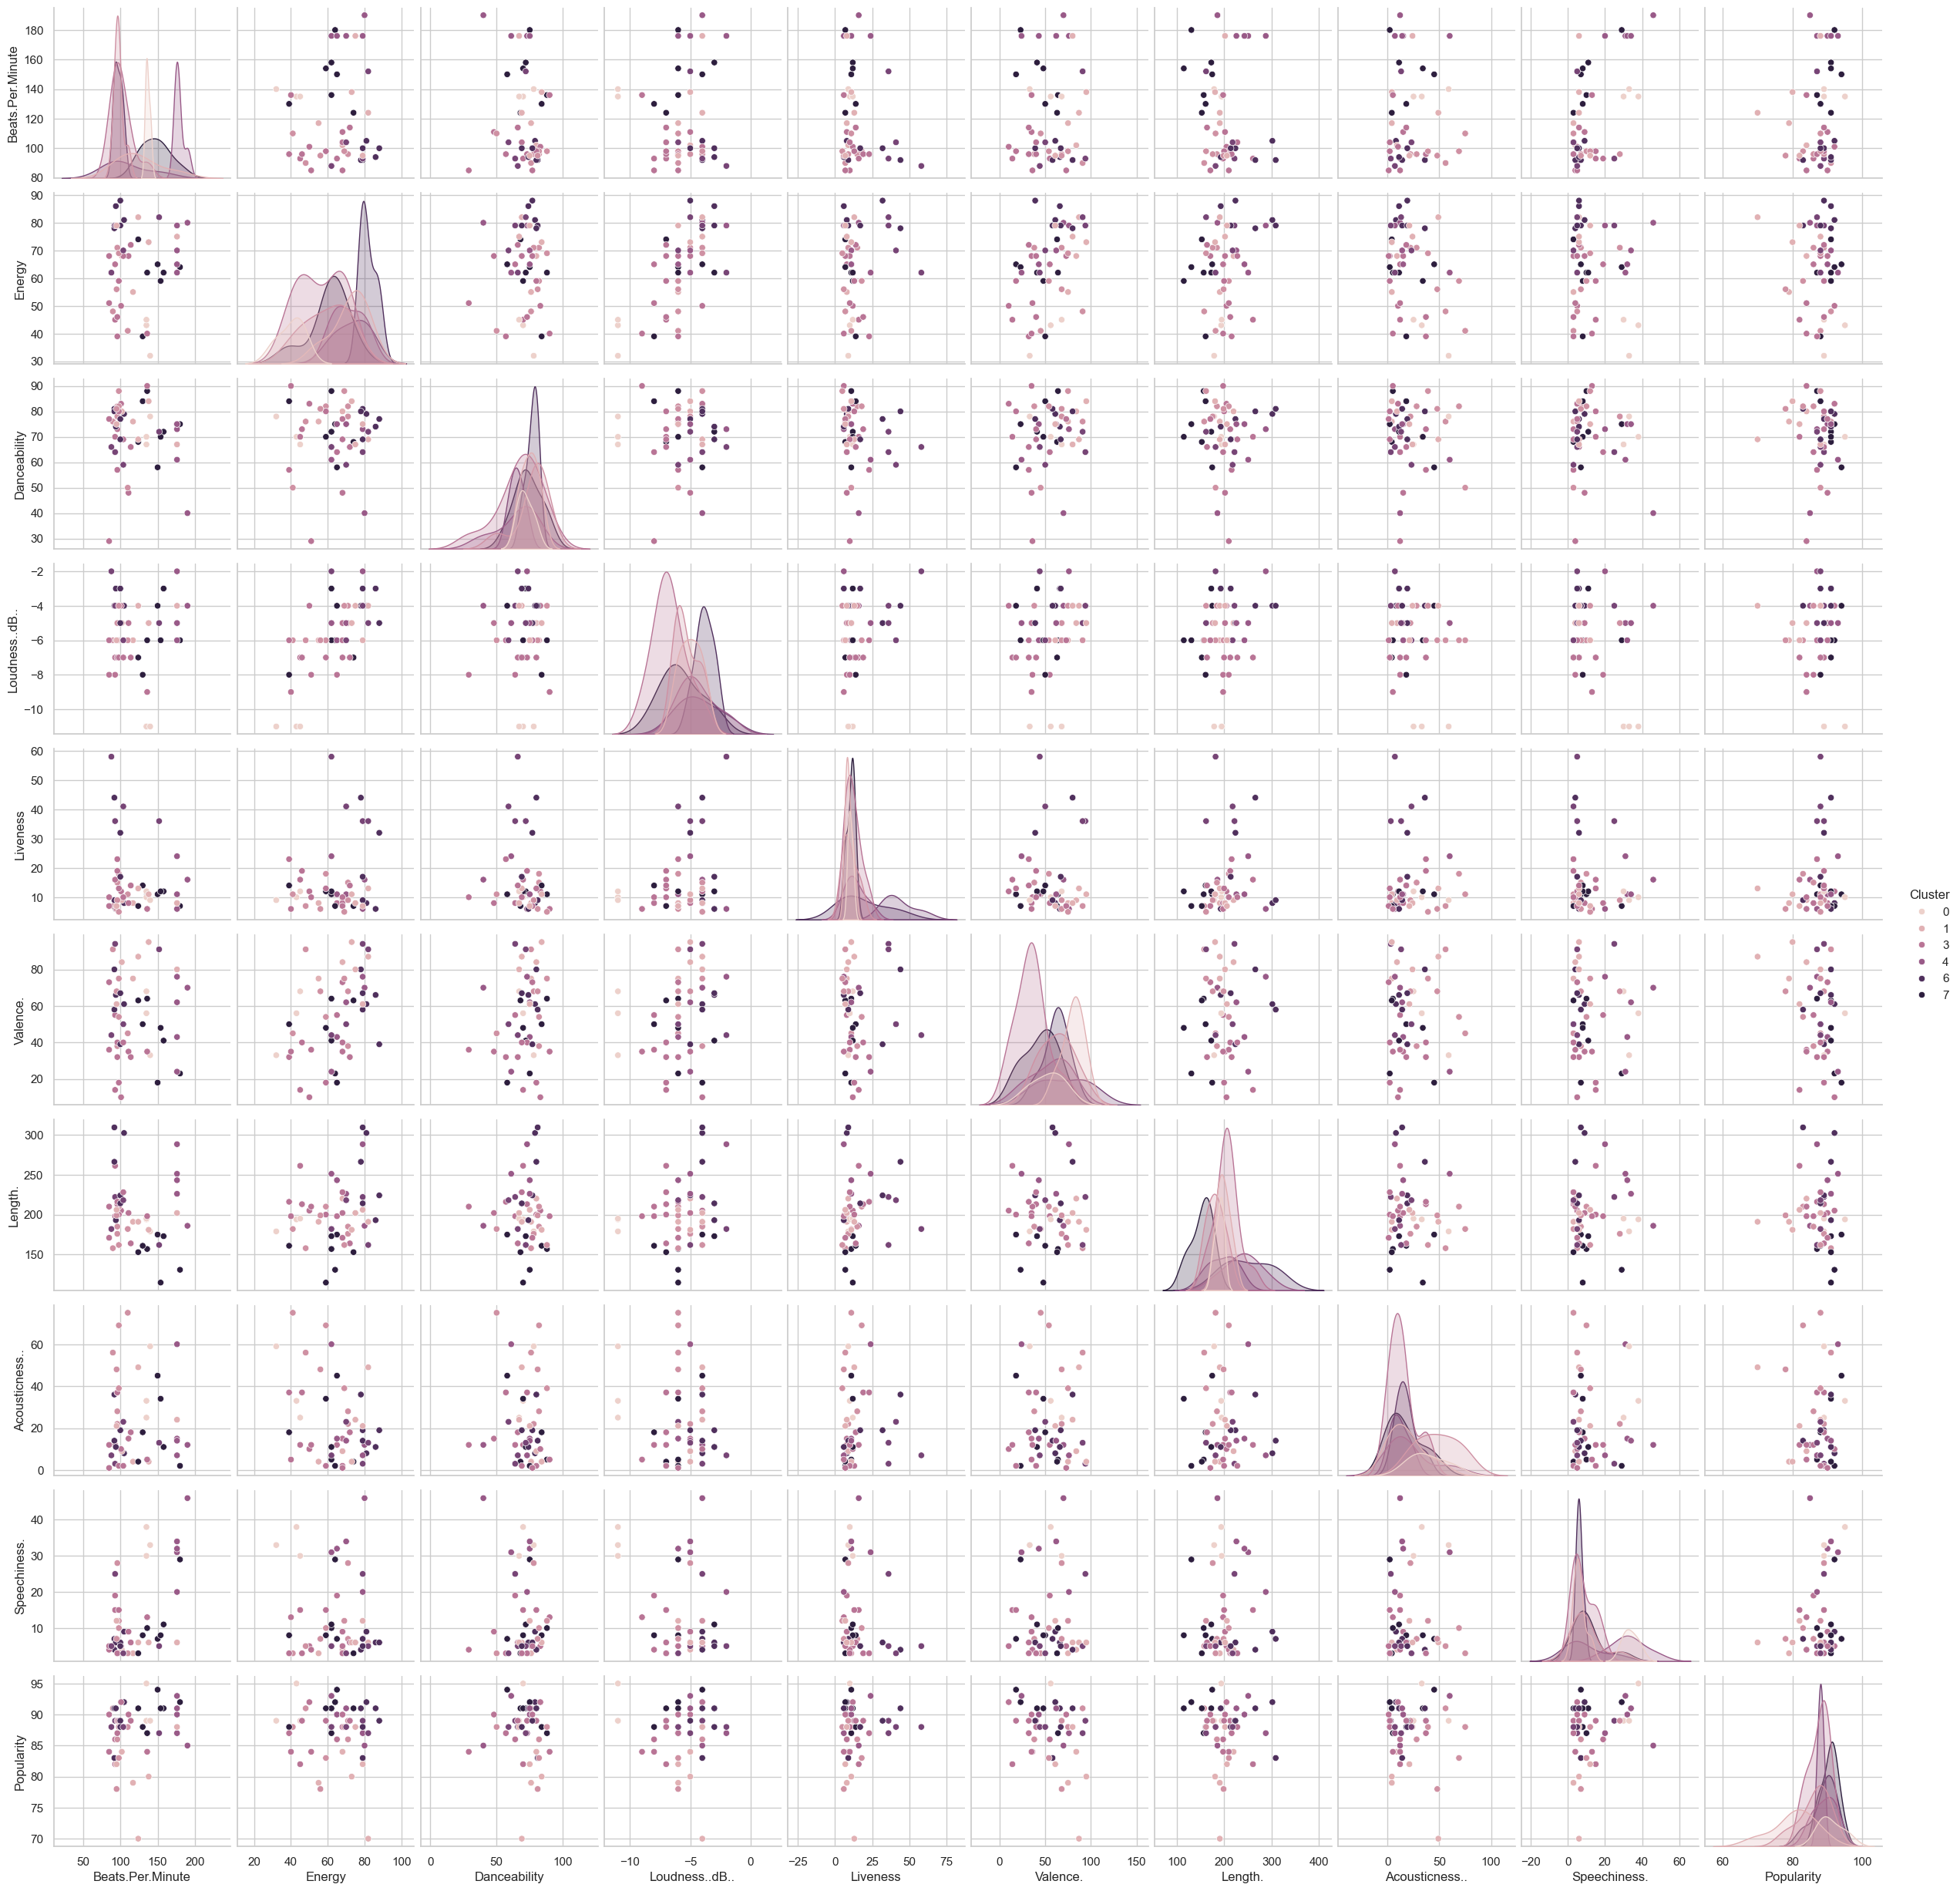

In [268]:
sns.pairplot(spotify, hue='Cluster', vars=['Beats.Per.Minute', 'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'])
plt.show()

#### 4.1.6 Analisis de resultados

Tras examinar el gráfico de parejas presentado, que compara diferentes características de las canciones en función de los clústeres asignados, se pueden realizar las siguientes observaciones sobre la relevancia de las características:

1. **Energía y Loudness (dB)**: Estas dos características parecen mostrar patrones distintivos entre los diferentes clústeres. Es evidente que ciertos clústeres tienen niveles más altos o más bajos de energía y loudness en comparación con otros.

2. **Danceability y Valence**: Al observar la dispersión de puntos en estos gráficos, es evidente que existen diferencias entre los clústeres, sugiriendo que estas características son relevantes para diferenciar entre los grupos.

3. **Acousticness**: Hay una clara separación entre los clústeres, especialmente entre aquellos con altos niveles de acústica y aquellos con niveles bajos o intermedios.

4. **Liveness**: Aunque la separación no es tan clara como en algunas otras características, todavía hay diferencias notables entre los clústeres, especialmente cuando se compara con características como la popularidad.

5. **Speechiness y Popularity**: Estas características muestran menos separación entre los clústeres en comparación con otras características mencionadas anteriormente. Sin embargo, todavía hay algunas diferencias que pueden ser de interés, aunque podrían no ser las características más relevantes para la segmentación.

6. **Beats Per Minute (BPM) y Length**: Aunque hay cierta dispersión en los datos, la separación entre clústeres no es tan evidente en estas características.

En resumen, basándose en la visualización presentada, las características de Energía, Loudness, Danceability, Valence y Acousticness parecen ser las más relevantes para diferenciar entre los clústeres en este conjunto de datos de Spotify. Sin embargo, es esencial combinar estas observaciones visuales con análisis cuantitativos para confirmar la relevancia de estas características en el proceso de agrupación.

#### 4.1.7 Analisiss cuantitativos para comprobar observaciones

Para corroborar las observaciones visuales de manera cuantitativa y eficiente, utilizaremos los siguientes tres métodos:

1. **Análisis de Varianza (ANOVA)**: Es una herramienta poderosa para determinar si existen diferencias significativas en las medias de las características entre los clústeres. Es útil para identificar qué características tienen las mayores diferencias entre grupos, lo cual es relevante para la formación de clústeres.

2. **Coeficiente de Silueta**: Este método es específico para evaluar la calidad de las agrupaciones. Al medir cuán similar es un objeto a su propio clúster en comparación con otros clústeres, puede ayudar a determinar qué características contribuyen más a la cohesión y separación de los clústeres.

3. **Correlación**: Calcular la correlación entre cada característica y las etiquetas de clúster asignadas puede proporcionar una idea rápida y directa del impacto de cada característica en la formación del clúster. Las características con altas correlaciones (positivas o negativas) con las etiquetas de clúster indicarán una mayor relevancia en la formación de los grupos.

Estos tres métodos proporcionan una combinación de análisis global (ANOVA), evaluación de calidad de clúster (Coeficiente de Silueta) y relación entre características y clústeres (Correlación), lo que debería ser suficiente para corroborar tus observaciones visuales.

##### 4.1.7.1 Análisis de Varianza (ANOVA)

                  F-statistic       P-value
Beats.Per.Minute    17.827623  9.876073e-11
Energy               7.886833  4.369417e-06
Danceability         1.083344  3.910369e-01
Loudness..dB..      12.313614  1.934210e-08
Liveness            10.493291  1.532817e-07
Valence.             4.990367  3.572156e-04
Length.              7.804169  4.901390e-06
Acousticness..       4.213863  1.343393e-03
Speechiness.        12.673029  1.314309e-08
Popularity           4.786158  5.029783e-04


##### 4.1.7.2 Coeficiente de Silueta

El coeficiente de silueta promedio es: 0.10152019980378393


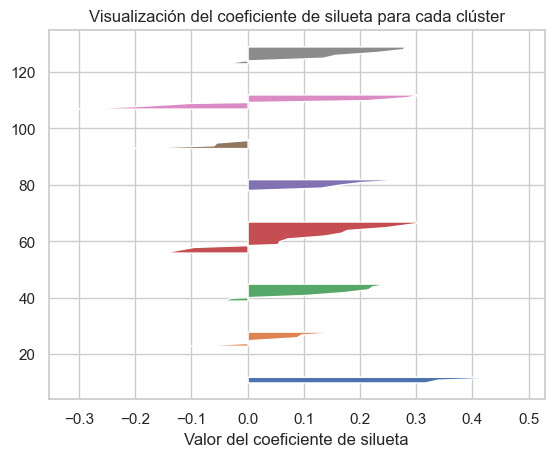

In [270]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Selecciona solo las columnas numéricas y excluye la columna 'Cluster'
X = spotify.select_dtypes(include=[np.number]).drop('Cluster', axis=1)

# Etiquetas de los clústeres
cluster_labels = spotify['Cluster']

# Coeficiente de silueta medio para todos los datos
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"El coeficiente de silueta promedio es: {silhouette_avg}")

# Calcular el coeficiente de silueta para cada muestra
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(len(spotify['Cluster'].unique())):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)
    y_lower = y_upper + 10

plt.title("Visualización del coeficiente de silueta para cada clúster")
plt.xlabel("Valor del coeficiente de silueta")
plt.show()


##### 4.1.7.3 Correlación

Beats.Per.Minute    0.155738
Energy              0.327428
Danceability       -0.008591
Loudness..dB..      0.399721
Liveness            0.276661
Valence.           -0.167110
Length.            -0.010143
Acousticness..     -0.300282
Speechiness.       -0.154924
Popularity          0.396890
Name: Cluster, dtype: float64


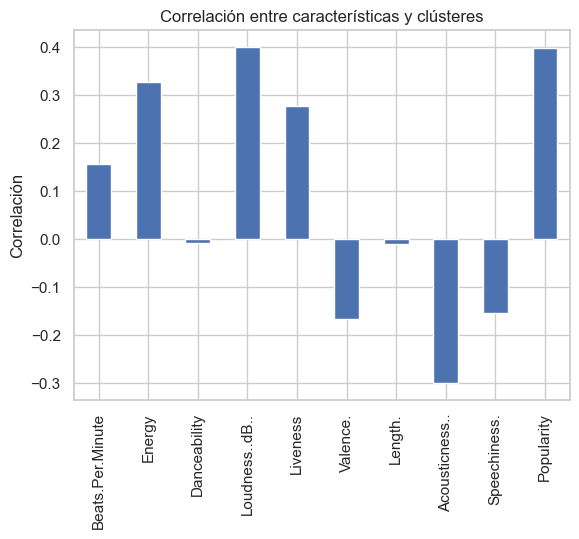

In [272]:
# Calcular correlación entre características y etiquetas de clúster
correlations = spotify[features + ['Cluster']].corr()['Cluster'].drop('Cluster')
print(correlations)

# Graficar
correlations.plot(kind='bar')
plt.title('Correlación entre características y clústeres')
plt.ylabel('Correlación')
plt.show()

In [265]:
print(spotify[['Track.Name', 'Artist.Name', 'Cluster']].head())

                        Track.Name    Artist.Name  Cluster
0                         Señorita   Shawn Mendes        1
1                            China       Anuel AA        1
2    boyfriend (with Social House)  Ariana Grande        0
3  Beautiful People (feat. Khalid)     Ed Sheeran        2
4      Goodbyes (Feat. Young Thug)    Post Malone        2


#### 4.1.8 Conclusiones

1. **Coeficiente de Silueta**: 
   - El coeficiente de silueta promedio es 0.0499, lo cual indica que los clusters no están bien diferenciados y hay un cierto grado de superposición entre ellos. Un valor cercano a 1 indica que los clusters están bien apartados, mientras que un valor cercano a -1 indica que las muestras podrían haberse asignado al clúster incorrecto. Un valor cercano a 0, como en este caso, indica que los clusters se superponen.

2. **Gráfico del Coeficiente de Silueta por Clúster**:
   - Ninguno de los clústeres parece tener un coeficiente de silueta que se acerque al valor ideal de 1, y todos ellos presentan una amplia variación en sus valores.

3. **Correlación entre Características y Clústeres**:
   - Las características con mayor correlación positiva con el clúster son `Loudness..dB..` y `Popularity`.
   - Las características con mayor correlación negativa con el clúster son `Speechiness.` y `Beats.Per.Minute`.

4. **Importancia de Características**:
   - Considerando la estadística F y el valor p:
     - Las características más significativas para determinar los clusters, basándonos en la F-statistic y el P-value, son: `Speechiness.`, `Liveness`, `Beats.Per.Minute`, y `Popularity`. Todas estas características tienen p-values muy bajos, lo que indica que son estadísticamente significativas en la formación de clusters.
     - Las características como `Danceability` y `Acousticness..` tienen un p-value alto, lo que indica que no son tan determinantes en la formación de clusters.
   
5. **Interpretación de las Características**:
   - `Speechiness.`: Tiene la mayor F-statistic y la correlación negativa más alta, lo que indica que es una característica clave que distingue entre los clústeres. Un valor más alto de Speechiness podría estar asociado con un tipo específico de música o género.
   - `Liveness` y `Beats.Per.Minute`: También tienen valores F-statistic altos, pero sus correlaciones no son tan pronunciadas como Speechiness. Estas características pueden influir en la energía y el ritmo de la música.
   - `Popularity`: Tiene una correlación positiva y un alto valor de F-statistic, lo que indica que las canciones más populares podrían agruparse en un clúster específico.

### 4.2 Análisis Hierarchical Clustering

#### 4.2.1 Justificacion

### 4.3 Análisis Density-Based Clustering: DBSCAN

#### 4.3.1 Justificacion

## 5. Conclusiones

¿Qué diferencia hay entre el conjunto inicial y el final? ¿Qué tan importante es lanormalización en este proceso?

¿Qué puede concluir respecto de ambos métodos utilizados?, ¿entregan resultados similares?
saque conclusiones del trabajo realizado.